In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [122]:
data = pd.read_csv('Salary_Data.csv')
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [124]:
data.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [125]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [126]:
data.dropna(inplace=True)

In [127]:
data['Job Title'].value_counts()

Job Title
Software Engineer                     518
Data Scientist                        453
Software Engineer Manager             376
Data Analyst                          363
Senior Project Engineer               318
                                     ... 
Junior Research Scientist               1
Senior Product Development Manager      1
Junior Social Media Specialist          1
Senior Software Architect               1
Social Media Man                        1
Name: count, Length: 191, dtype: int64

In [128]:
unique_jobs = sorted(data["Job Title"].unique())
joblib.dump(unique_jobs, "job_titles.pkl")

['job_titles.pkl']

In [129]:
data['Education Level'].value_counts()

Education Level
Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

In [130]:
data.replace({'Education Level': {"Bachelor's Degree": "Bachelor's","Master's Degree": "Master's","phD": "PhD"}}, inplace=True)
data['Education Level'].value_counts()

Education Level
Bachelor's     3021
Master's       1860
PhD            1369
High School     448
Name: count, dtype: int64

In [131]:
data['Gender'].value_counts()

Gender
Male      3671
Female    3013
Other       14
Name: count, dtype: int64

In [132]:
data['Age'].value_counts()

Age
27.0    516
30.0    449
29.0    444
28.0    429
33.0    398
26.0    393
31.0    364
32.0    351
34.0    309
25.0    284
36.0    281
24.0    240
35.0    200
42.0    176
39.0    158
43.0    158
37.0    156
38.0    149
45.0    144
41.0    129
44.0    126
23.0    104
46.0    102
48.0     98
40.0     92
49.0     91
50.0     88
54.0     68
47.0     47
51.0     30
52.0     29
21.0     18
55.0     16
22.0     15
56.0     11
57.0      9
53.0      7
58.0      7
62.0      5
60.0      5
61.0      2
Name: count, dtype: int64

In [133]:
data['Years of Experience'].value_counts()

Years of Experience
2.0     610
3.0     602
1.0     540
4.0     522
6.0     438
8.0     425
5.0     399
9.0     380
7.0     352
11.0    320
12.0    294
14.0    253
16.0    242
13.0    209
10.0    192
15.0    129
18.0    126
19.0    121
0.0     120
17.0    106
20.0     61
22.0     47
21.0     42
23.0     37
25.0     24
24.0     19
28.0     16
29.0     12
1.5      12
27.0     11
32.0     10
26.0      7
30.0      6
33.0      6
31.0      5
34.0      2
0.5       1
Name: count, dtype: int64

In [134]:
data['Salary'].value_counts()

Salary
140000.0    287
120000.0    282
160000.0    276
55000.0     251
170000.0    231
           ... 
178284.0      1
75969.0       1
143705.0      1
197354.0      1
100358.0      1
Name: count, Length: 444, dtype: int64

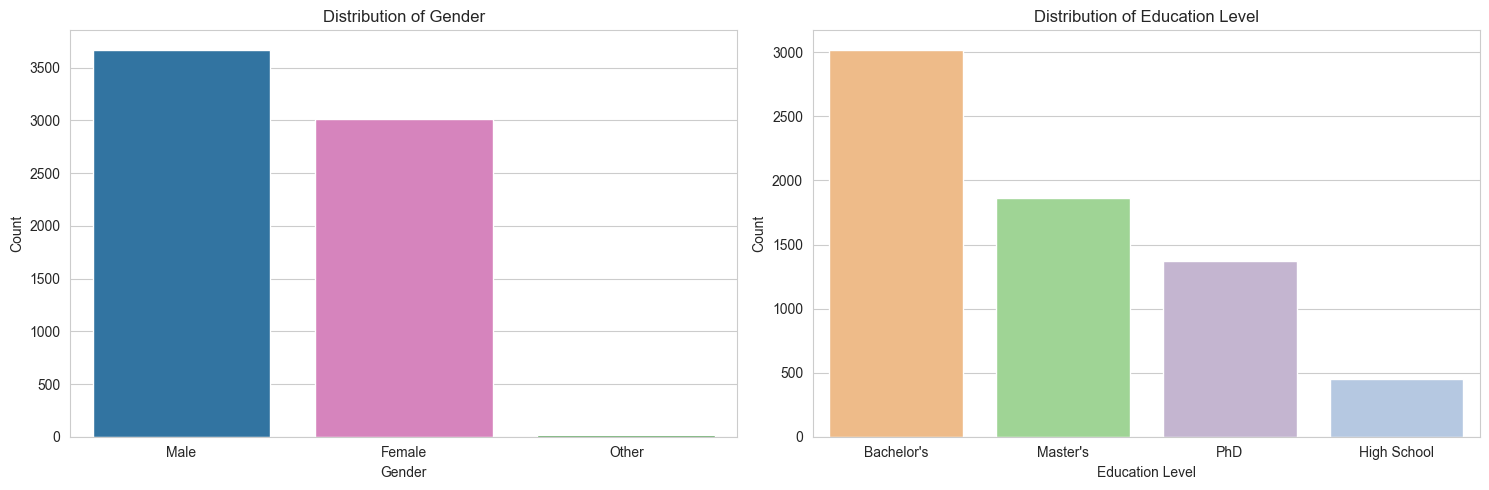

In [135]:
palette_gender = {'Male': '#1f77b4','Female': '#e377c2','Other': '#2ca02c' }
palette_edu = {'High School': '#aec7e8',"Bachelor's": '#ffbb78',"Master's": '#98df8a','PhD': '#c5b0d5'}
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='Gender', hue='Gender', data=data, ax=ax[0], palette=palette_gender, legend=False)
sns.countplot(x='Education Level', hue='Education Level', data=data, ax=ax[1], palette=palette_edu, legend=False)
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Gender')
ax[1].set_xlabel('Education Level')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Education Level')
plt.tight_layout()
plt.show()

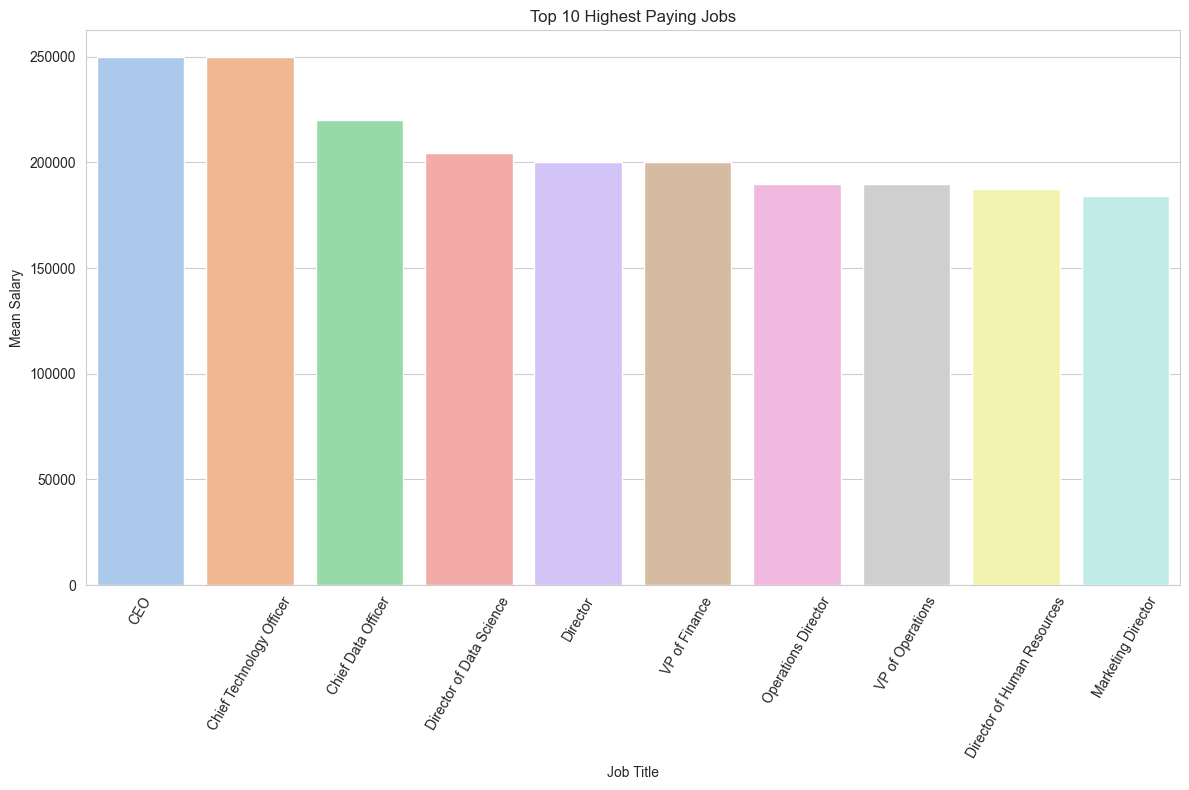

In [136]:
top_10_highest_paying_jobs = data.groupby('Job Title')['Salary'].mean().nlargest(10).reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_10_highest_paying_jobs,
    x='Job Title',
    y='Salary',
    hue='Job Title',       
    palette='pastel',
    legend=False          
)
plt.xlabel('Job Title')
plt.ylabel('Mean Salary')
plt.title('Top 10 Highest Paying Jobs')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

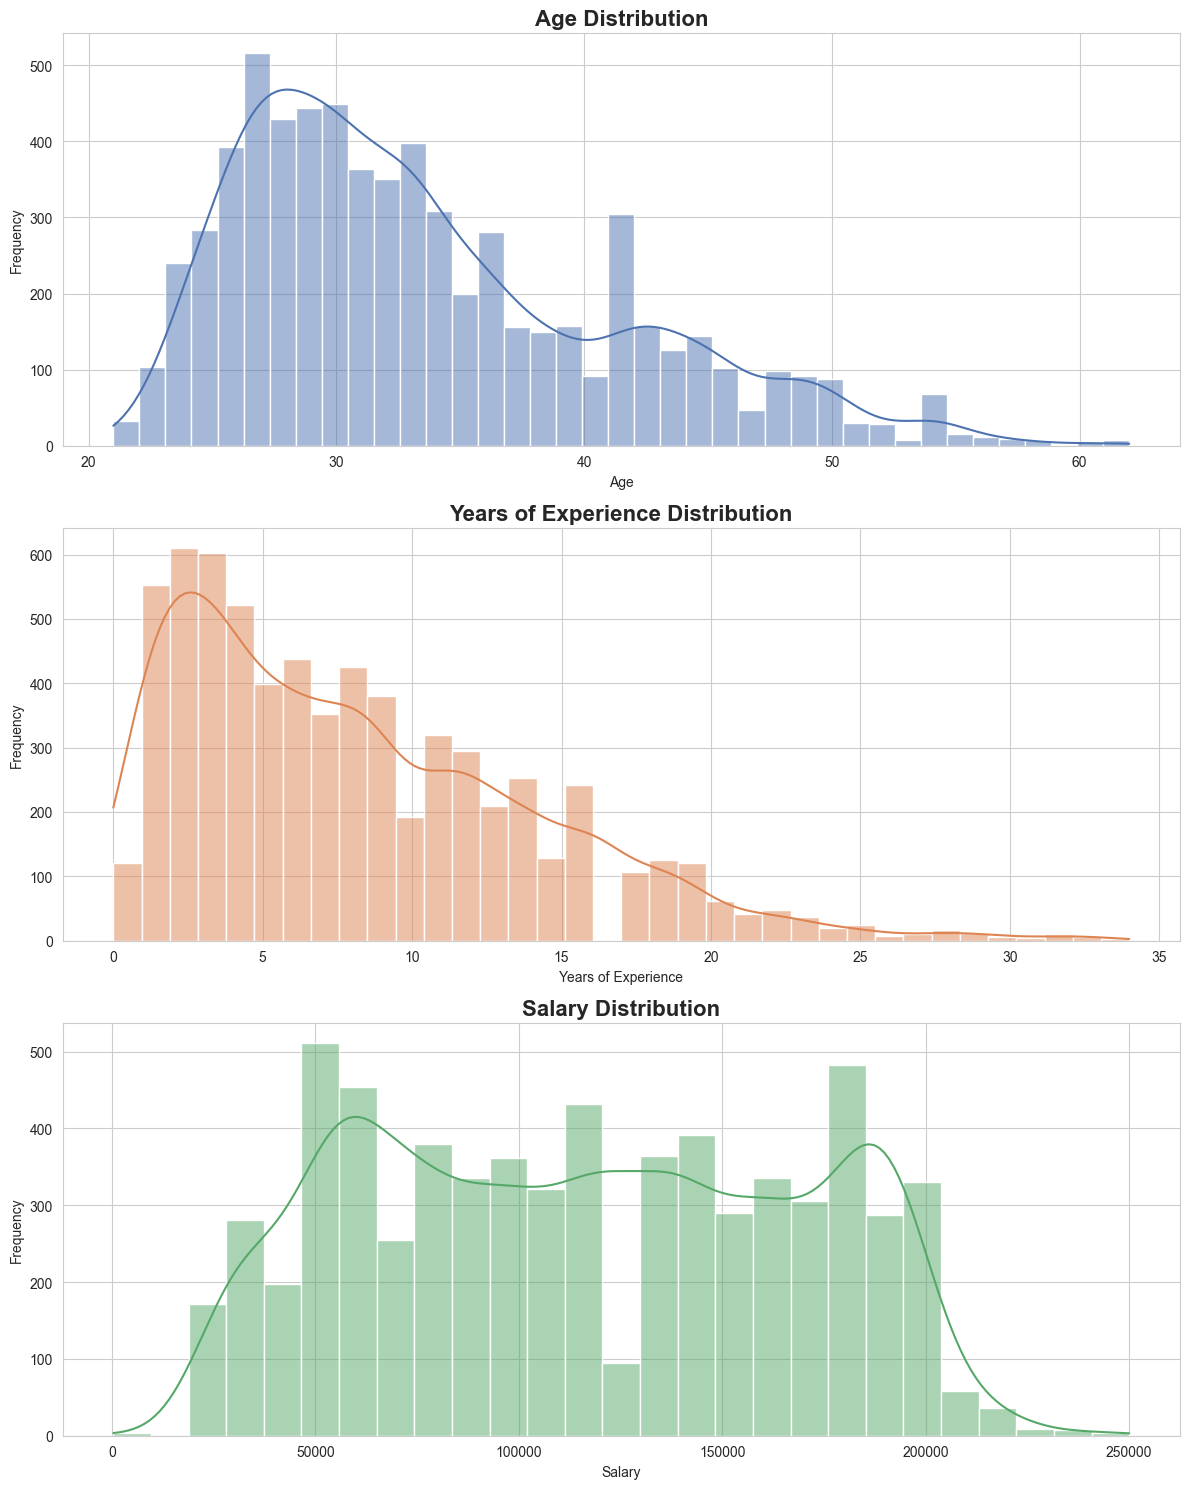

In [137]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(3, 1, figsize=(12, 15))
sns.histplot(data['Age'], ax=ax[0], color='#4c72b0', kde=True)
ax[0].set_title('Age Distribution', fontsize=16, fontweight='bold')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')
ax[0].grid(True)
sns.histplot(data['Years of Experience'], ax=ax[1], color='#dd8452', kde=True)
ax[1].set_title('Years of Experience Distribution', fontsize=16, fontweight='bold')
ax[1].set_xlabel('Years of Experience')
ax[1].set_ylabel('Frequency')
ax[1].grid(True)
sns.histplot(data['Salary'], ax=ax[2], color='#55a868', kde=True)
ax[2].set_title('Salary Distribution', fontsize=16, fontweight='bold')
ax[2].set_xlabel('Salary')
ax[2].set_ylabel('Frequency')
ax[2].grid(True)
plt.tight_layout()
plt.show()

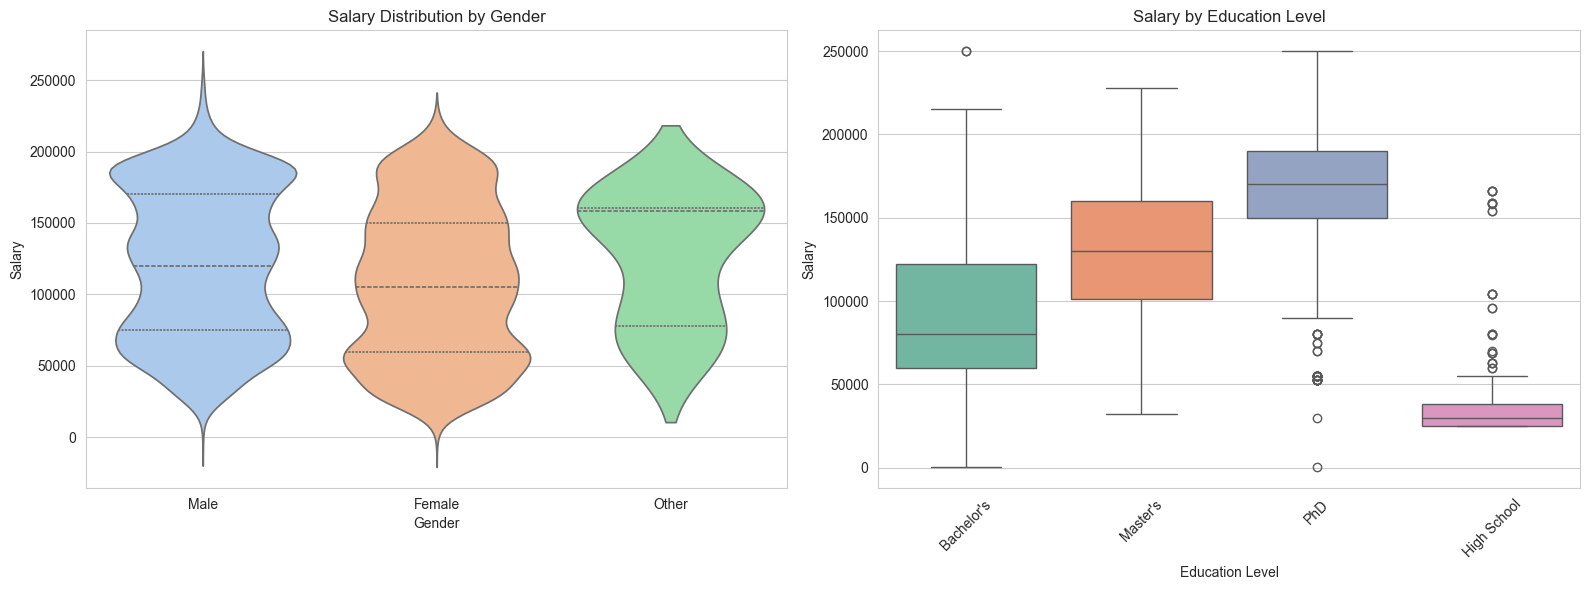

In [138]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.violinplot(x='Gender', y='Salary', hue='Gender', data=data, ax=ax[0],palette='pastel', inner='quartile', legend=False)
ax[0].set(title='Salary Distribution by Gender', xlabel='Gender', ylabel='Salary')
sns.boxplot(x='Education Level', y='Salary', hue='Education Level', data=data, ax=ax[1],palette='Set2', legend=False)
ax[1].set(title='Salary by Education Level', xlabel='Education Level', ylabel='Salary')
ax[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

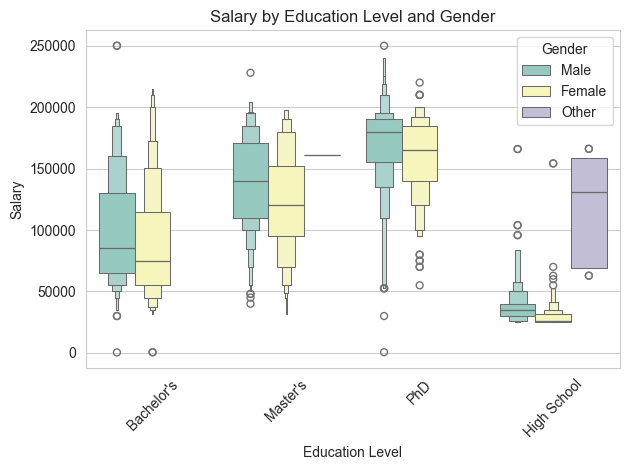

In [139]:
sns.boxenplot(x='Education Level', y='Salary', hue='Gender', data=data, palette='Set3')
plt.title('Salary by Education Level and Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

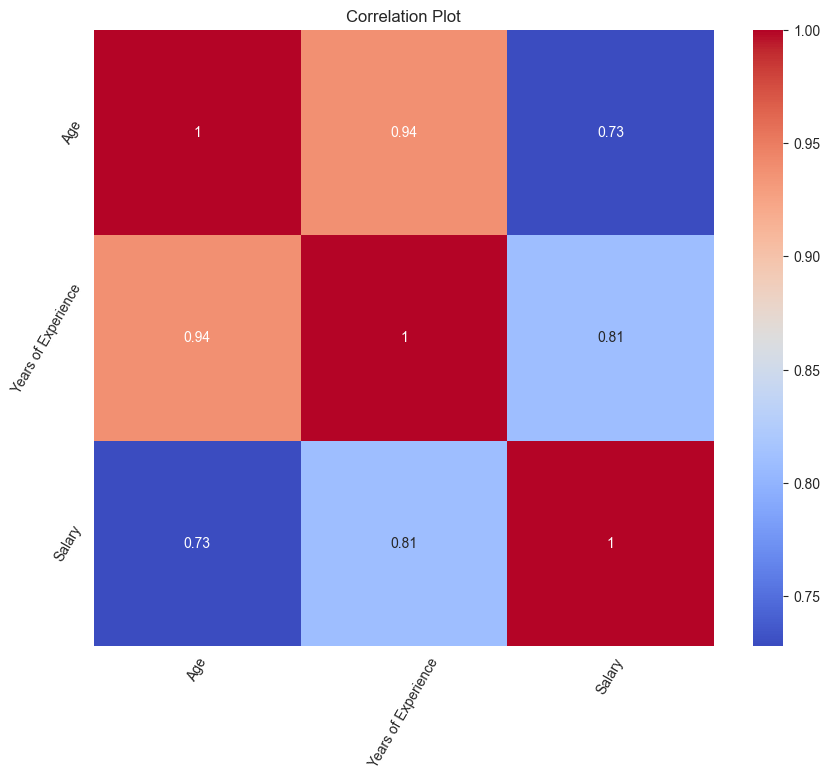

In [140]:
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.show()

In [141]:
le_gender = LabelEncoder()
le_edu = LabelEncoder()
le_job = LabelEncoder()

data['Gender'] = le_gender.fit_transform(data['Gender'])
data['Education Level'] = le_edu.fit_transform(data['Education Level'])
data['Job Title'] = le_job.fit_transform(data['Job Title'])

In [142]:
X = data[['Age', 'Years of Experience', 'Gender', 'Education Level', 'Job Title']]
y = data['Salary']

In [143]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [145]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results[name] = {'RMSE': rmse, 'R2 Score': r2}
    joblib.dump(model, f"{name.replace(' ', '_')}_model.pkl")
    print(f"\n{name} Results:")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")


Linear Regression Results:
RMSE: 30000.88
R² Score: 0.68

Random Forest Results:
RMSE: 9851.22
R² Score: 0.97

Gradient Boosting Results:
RMSE: 15601.25
R² Score: 0.91


In [146]:
result_df = pd.DataFrame(results).T
print("\nModel Comparison:\n", result_df)


Model Comparison:
                            RMSE  R2 Score
Linear Regression  30000.880712  0.684354
Random Forest       9851.215308  0.965966
Gradient Boosting  15601.246309  0.914641


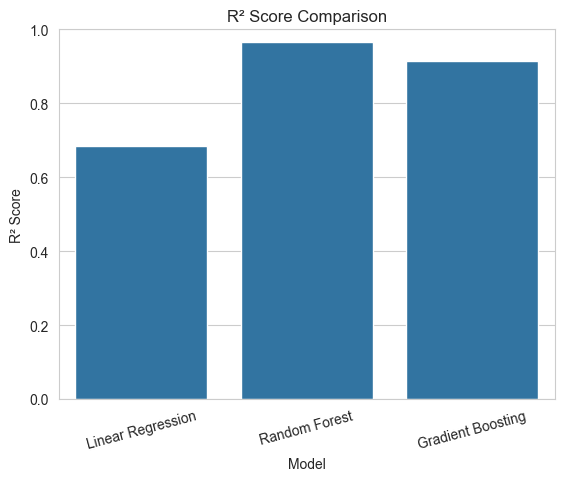

In [147]:
sns.barplot(data=result_df.reset_index(), x='index', y='R2 Score')
plt.title("R² Score Comparison")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()

In [148]:
best_model_name, best_model_metrics = max(results.items(), key=lambda x: x[1]['R2 Score'])
best_model = models[best_model_name]
joblib.dump(best_model, "best_salary_model.pkl")
joblib.dump(list(X.columns), "model_features.pkl")
print("\n✅ Best model for Salary Prediction is:", best_model_name)


✅ Best model for Salary Prediction is: Random Forest
